## Simulazione II Esame di Metodi Numerici Soluzioni##

In [374]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt
import SolveTriangular
from math import sqrt

In [375]:
dati = loadmat("Test_II.mat")
A1 = dati["A1"]
A1 = A1.astype(float)
b1 = dati["b1"]
b1 = b1.astype(float)
A2 = dati["A2"]
A2 = A2.astype(float)
b2 = dati["b2"]
b2 = b2.astype(float)
A3 = dati["A3"]
A3 = A3.astype(float)
b3 = dati["b3"]
b3 = b3.astype(float)

Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. 
- Risolvere i 3 sistemi lineari aventi matrice dei coefficienti A1 e termine noto b1, matrice dei coefficienti A2 e termine noto b2, matrice dei coefficienti A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

                                                                                            punti 12


In [376]:
m, n = A1.shape
size = m*n

print("====Matrice A1====")
print(f"Gradezza: {m}x{n}")
print("Quadrata:", m==n)
print("Sparsa:", np.count_nonzero(A1) / size < 0.33)
print("Simmetrica:", np.all(A1.T == A1))
print("Definita positiva:", np.all(npl.eigvals(A1) > 0))
print("Condizionamento:", npl.cond(A1))
print("Mal condizionata:", np.log10(npl.cond(A1)) > 3)

====Matrice A1====
Gradezza: 10x10
Quadrata: True
Sparsa: False
Simmetrica: True
Definita positiva: False
Condizionamento: 120.61487223223162
Mal condizionata: False


In [377]:
def LUsolve(P, L, U, b):
    y, flag = SolveTriangular.Lsolve(L, P @ b)
    if flag == 0:
        return SolveTriangular.Usolve(U, y)
    else:
        return None, None

In [378]:
PT, L, U = spl.lu(A1)
P = PT.T.copy()
x, flag = LUsolve(P, L, U, b1)
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [379]:
m, n = A2.shape
size = m*n

print("====Matrice A2====")
print(f"Gradezza: {m}x{n}")
print("Quadrata:", m==n)
print("Sparsa:", np.count_nonzero(A2) / size < 0.33)
print("Condizionamento:", npl.cond(A2))
print("Mal condizionata:", np.log10(npl.cond(A2)) > 3)


====Matrice A2====
Gradezza: 25x10
Quadrata: False
Sparsa: False
Condizionamento: 10000.000000000557
Mal condizionata: True


In [380]:
def SVDLS(A,b):
    #Risolve un sistema sovradeterminato con il metodo SVD-LS
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=spl.svd(A)  #Attenzione : Restituisce U, il numpy-array 1d che contiene la diagonale della matrice Sigma e VT=VTrasposta)
    #Quindi 
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    print("rango=",k)
    d = U.T @ b
    d1=d[:k].reshape(k, 1)
    s1=s[:k].reshape(k, 1)
    #Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c= d1 / s1
    x=V[:,:k]@c
    residuo=np.linalg.norm(d[k:])**2
    return x,residuo

In [381]:
x, residuo = SVDLS(A2, b2)
print(x)

rango= 10
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [382]:
m, n = A3.shape
size = m*n

print("====Matrice A3====")
print(f"Gradezza: {m}x{n}")
print("Quadrata:", m==n)
print("Sparsa:", np.count_nonzero(A3) / size < 0.33)
print("Simmetrica:", np.all(A3.T == A3))
print("Definita positiva:", np.all(npl.eigvals(A3) > 0))
print("Condizionamento:", npl.cond(A3))
print("Mal condizionata:", np.log10(npl.cond(A3)) > 3)


====Matrice A3====
Gradezza: 225x225
Quadrata: True
Sparsa: True
Simmetrica: True
Definita positiva: True
Condizionamento: 103.0868689198173
Mal condizionata: False


In [383]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]

   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0

    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)

    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it < itmax:
        it=it+1
        Ap= A @ p
        alpha = (r.T @ r) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T @ r) / rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p

    return x,vet_r,vec_sol,it


In [384]:
x0 = np.zeros_like(b3)
itmax = 100
x, vet_err, vet_sol, it = conjugate_gradient(A3, b3, x0, itmax, 1e-12)
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

- Verificare se le matrici sono malcondizionate. Indicare la formula matematica dell'indice di condizionamento e spiegare perchè è importante conoscere l'indice di condizionamento di una matrice.
                                                                                           
                                                                                           punti 2

In [385]:
print(npl.cond(A3))
print(npl.norm(npl.inv(A3), 2) * npl.norm(A3, 2))

103.0868689198173
103.08686891981753


> l'indice di condizionamento di una matrice è uguale alla norma della sua inversa per la norma delle matrice stessa. è importante conoscere l'indice di condizionamento di una matrice perché influsce sulla scelta del algoritmo da utilizzare. un indice di condizionamento alto indica che la matrice è mal condizionata, il che significa che piccole variazioni nei dati di input (come errori di arrotondamento) possono causare grandi variazioni nei risultati. Questo è particolarmente problematico nei calcoli numerici, dove gli errori di arrotondamento sono inevitabili.


- Dopo aver copiato nel numpy array b1p il termine noto b1 del primo sistema lineare con matrice dei coefficienti A1, effettuarne una perturbazione della prima componente nel seguente modo b1p[0]=b1p[0]+0.001*b1p[0]. Risolvere il sistema lineare con matrice A1 e termine noto perturbato b1p. Calcolare l'errore relativo sulla soluzione e l'errore relativo sul termine noto, descrivere ciò che si verifica giustificandolo alla luce della teoria.

                                                                                           punti 2

In [386]:
b1p = b1.copy()
b1p[0]=b1p[0]+0.001*b1p[0]

Q, R = spl.qr(A1)
y = Q.T @ b1p
xp, flag = SolveTriangular.Usolve(R, y)

PT, L, U = spl.lu(A1)
P = PT.T.copy()
x, flag = LUsolve(P, L, U, b1)

err_rel_x = npl.norm(xp - x) / npl.norm(x)
err_rel_b = npl.norm(b1p - b1) / npl.norm(b1)

print("Erorre relativo soluzione:", err_rel_x)
print("Erorre relativo termine noto:", err_rel_b)

Erorre relativo soluzione: 0.011286868660946262
Erorre relativo termine noto: 0.00033571399214796726


> visto l'indice di condizionamento leggermente elevato (p=2) per una matrice di piccole dimensioni una piccola perturbazione sui dati genera una perturbazione sulla soluzione dello stesso ordine (10^2)

                                                                    Punti 16

## Esercizio 2 ##

Per ogni $k \in N$ l'equazione di II grado $x^2+(2^{2k}-3^{-2k})x-2^{2k}3^{-2k}=0 $ ha come soluzioni esatte $x_1=-2^{2k}$,$x_2=3^{-2k}$,

Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 6 e 16;  [**Punti 2**]

In [387]:
k = np.linspace(6, 16, 11)
b = 4**k - 1/9**k
c = -4**k * 1/9**k
x1p = (-b - np.sqrt(b**2 - 4 * c)) / 2
x2p = (-b + np.sqrt(b**2 - 4 * c)) / 2
x1 = -4**k
x2 = 1/9**k

- per entrambe le soluzioni, si calcoli l'errore relativo commesso al variare di k che assume valori interi tra 6 e 16;   [**Punti 1**]

In [388]:
err_x1 = np.abs(x1p - x1) / np.abs(x1)
err_x2 = np.abs(x2p - x2) / np.abs(x2)

- si rappresentino in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]

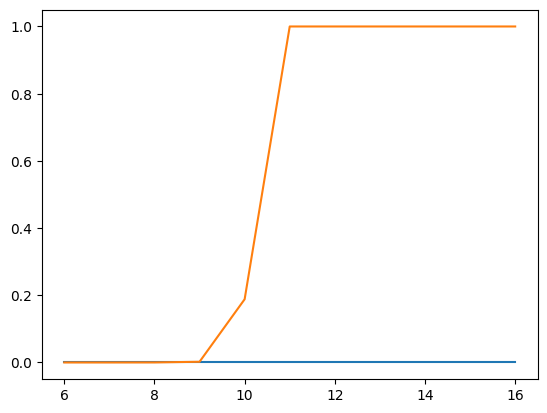

In [389]:
plt.plot(k, err_x1, k, err_x2)

- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria. [**Punti 6**]

In [400]:
delta_sqrt = np.sqrt(b**2 - 4 * c)
print((b - delta_sqrt) < np.spacing(b))

[ True  True  True  True  True  True  True  True  True  True  True]


> l'algoritmo per il calcolo della variabile x2 è instabile perché si ha la somma di due termini molto vicini in modulo ma di segno opposto (-b + sqrt(b^2 - 4*a*c))

- in caso di instabilita', si fornisca un algoritmo di calcolo stabile e si mostrino in un nuovo grafico gli
andamenti dei nuovi errori relativi ottenuti. [**Punti 6**]

In [390]:
x2p = c / x1p  # x2 = c / (a*x1)

In [391]:
err_x1 = np.abs(x1p - x1) / np.abs(x1)
err_x2 = np.abs(x2p - x2) / np.abs(x2)

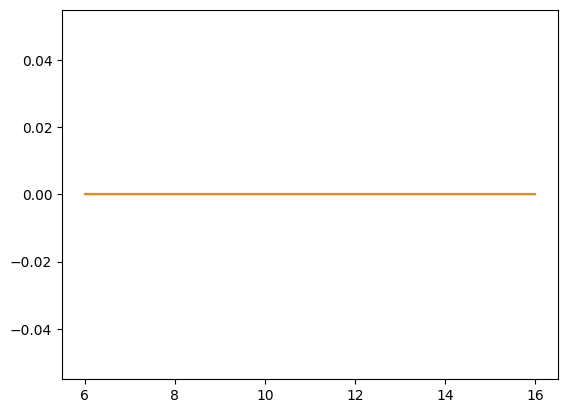

In [392]:
plt.plot(k, err_x1, k, err_x2)

> è dimostrabile che il prodotto x1*x2 = c/a, è quindi possibile ricavare un termine conoscendo l'altro